In [66]:
## Questions ##
#- Can you make the salary column into integers?
#- What information can you extract out of job descriptions?
#- How can you remove the numbers from the company name?
#- How can you create some new feature? (e.g. state column from each location column)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./Uncleaned_DS_jobs.csv")

In [43]:
#- Can you make the salary column into integers?


# Check if any null values in 'Salary Estimate' column
if df['Salary Estimate'].isnull().any():
    print("Null values present in 'Salary Estimate' column")

# Extract min and max salary using a function
def extract_salary(salary_range):
    salary_values = salary_range.replace("$", "").replace("K", "").split("(")[0].split("-")
    return int(salary_values[0]), int(salary_values[1])

# Apply the function to create new 'Min Salary' and 'Max Salary' columns
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].apply(extract_salary).apply(pd.Series)


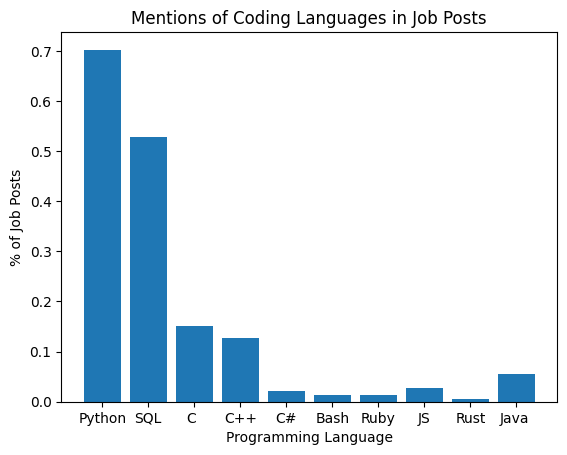

In [107]:
#- What information can you extract out of job descriptions?

# Check if any null values in 'Job Descriptions' column
if df['Job Description'].isnull().any():
    print("Null values present in 'Job Description' column")
    
num_descriptions = (len(df['Job Description']))

# We can count how often a certain programming language is mentioned
languages = {"Python": 0, "SQL": 0, "C ": 0, "C++": 0, "C#": 0,"Bash": 0, "Ruby": 0, "JS": 0, "Rust": 0,"Java ": 0}

for description in df['Job Description']:
    for language in languages.keys():
        if language in description:
            languages[language] += 1

language = list(languages.keys())
values = [i/num_descriptions for i in list(languages.values())]

#Plot bar chart
plt.bar(language, values)
plt.ylabel("% of Job Posts")
plt.xlabel("Programming Language")
plt.title("Mentions of Coding Languages in Job Posts")
plt.show()